In [176]:

# a) Load libraries
# standard imports
import os

# Third Party Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelBinarizer


In [178]:
# Load dataset
file_path = "train_u6lujuX_CVtuZ9i.csv"
df = pd.read_csv(file_path)

In [179]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [180]:
df.shape

(614, 13)

In [181]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [182]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

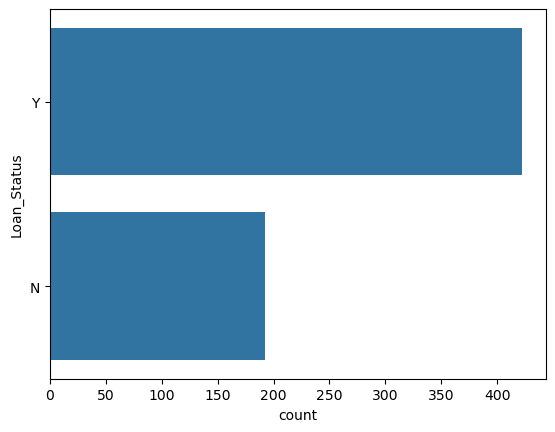

In [183]:
sns.countplot(df['Loan_Status'])
plt.show()

<Axes: xlabel='count', ylabel='Gender'>

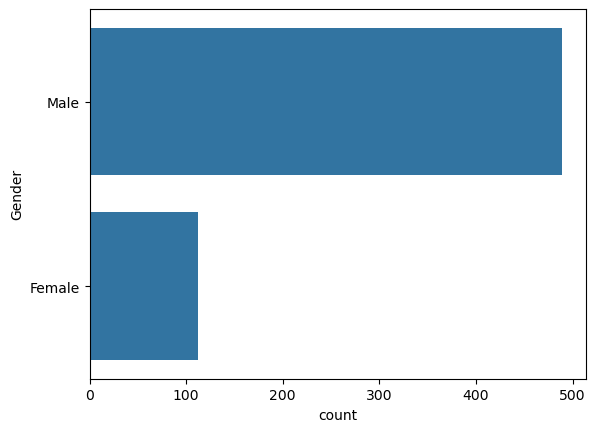

In [184]:
sns.countplot(df['Gender'])

<Axes: xlabel='count', ylabel='Dependents'>

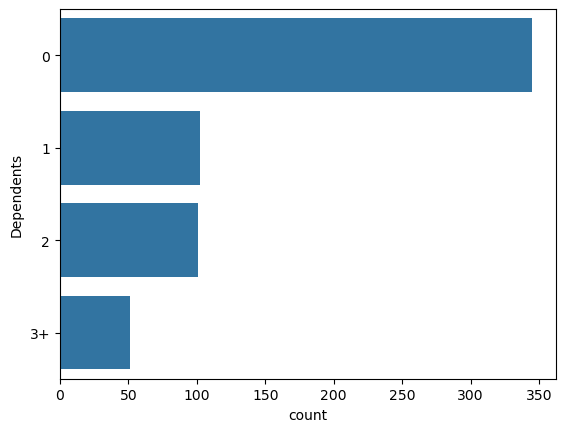

In [185]:
sns.countplot(df['Dependents'])

<Axes: ylabel='count'>

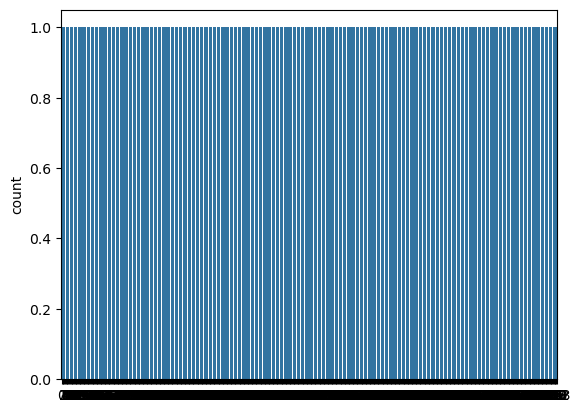

In [186]:
sns.countplot(df['Credit_History'])

<Axes: xlabel='count', ylabel='Education'>

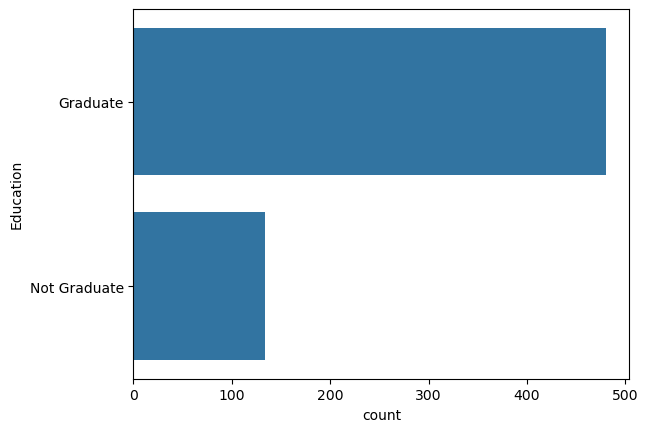

In [187]:
sns.countplot(df['Education'])

<Axes: xlabel='count', ylabel='Self_Employed'>

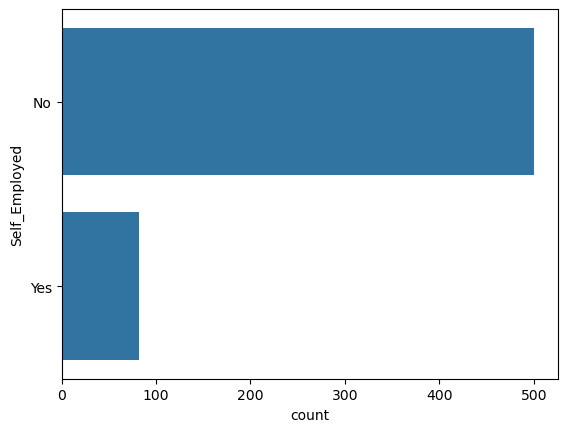

In [188]:
sns.countplot(df['Self_Employed'])

<Axes: xlabel='count', ylabel='Property_Area'>

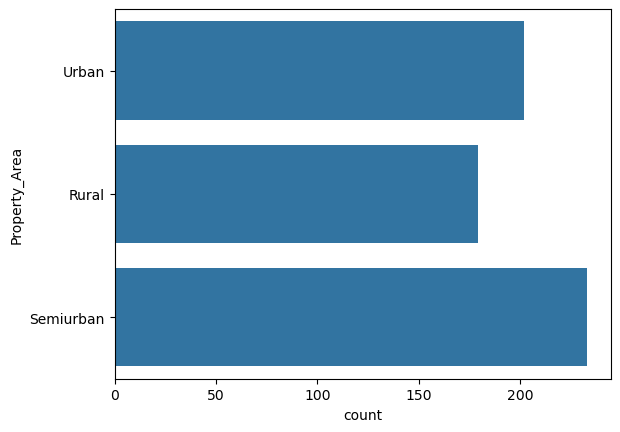

In [192]:
sns.countplot(df['Property_Area'])

In [193]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [194]:
#Filling the non numerical missing number with the mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
#Filling the numerical missing values with either median or mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [195]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [196]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

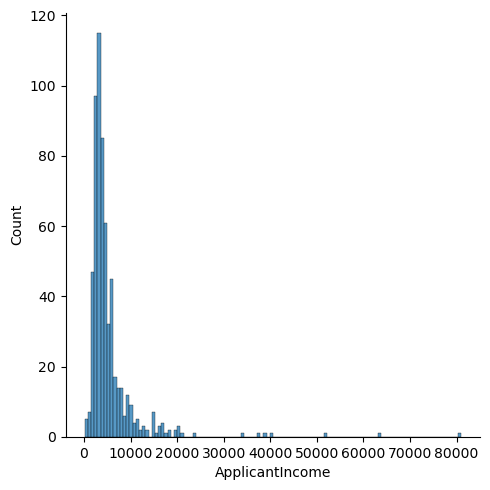

In [197]:
# Numerical attributes visualization
sns.displot(df['ApplicantIncome'])

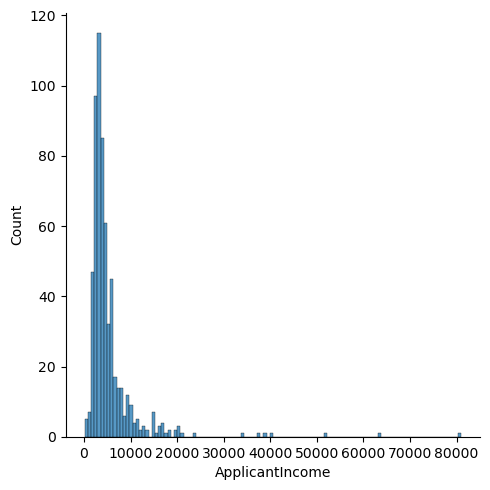

In [198]:
sns.displot(df['ApplicantIncome'])

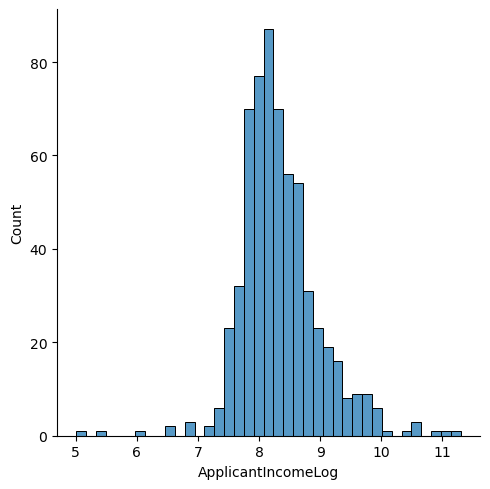

In [199]:
# Apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.displot(df['ApplicantIncomeLog'])

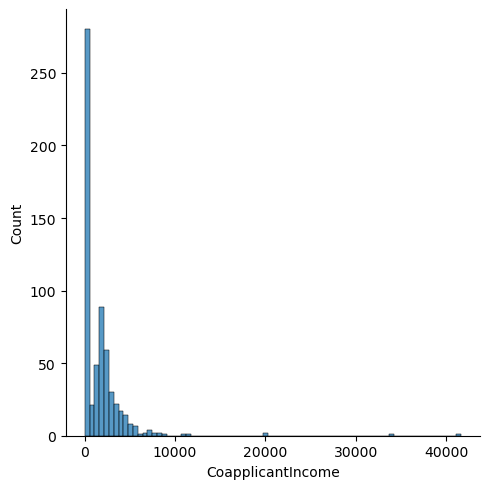

In [200]:
sns.displot(df['CoapplicantIncome'])

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


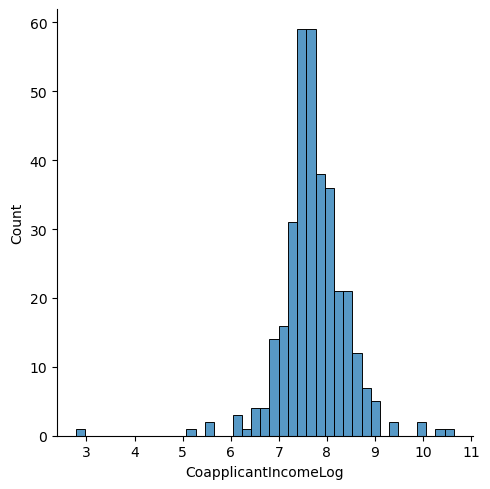

In [201]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.displot(df['CoapplicantIncomeLog'])

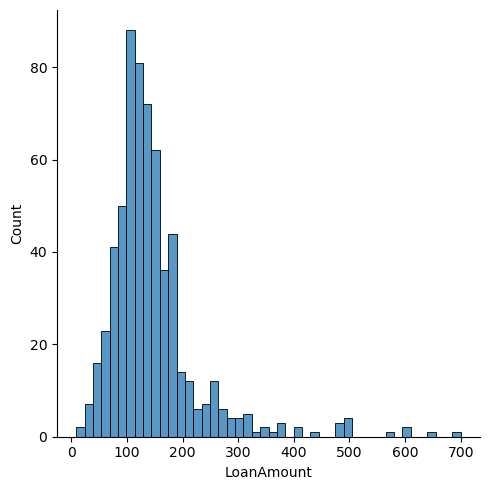

In [204]:
sns.displot(df['LoanAmount'])

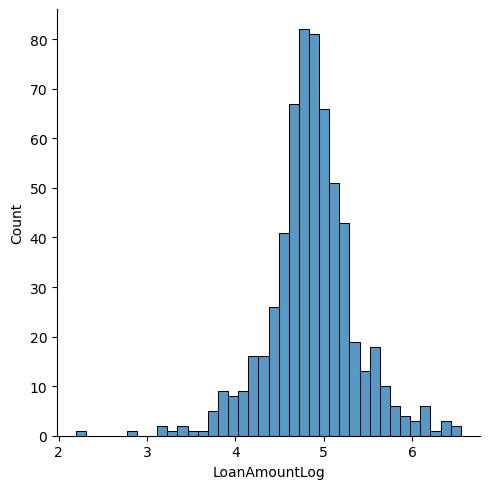

In [205]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.displot(df['LoanAmountLog'])

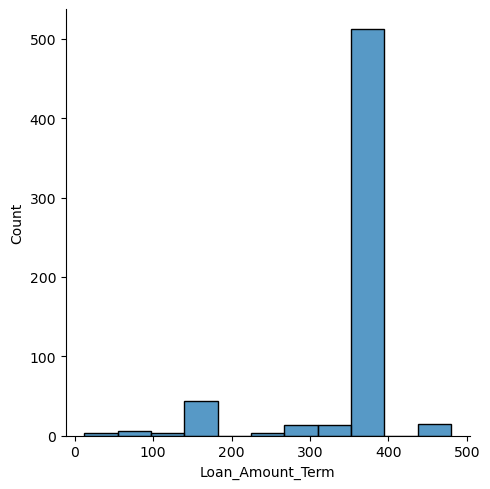

In [206]:
sns.displot(df['Loan_Amount_Term'])

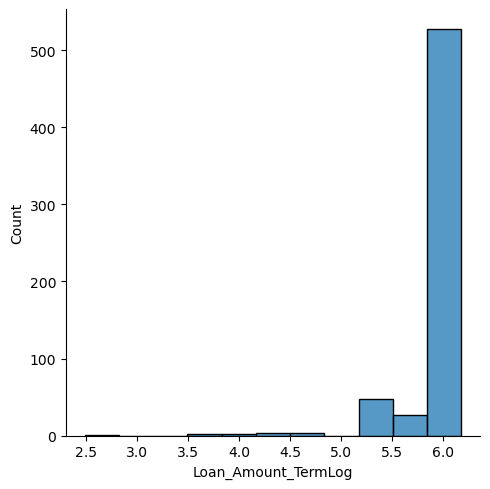

In [207]:
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'])
sns.displot(df['Loan_Amount_TermLog'])

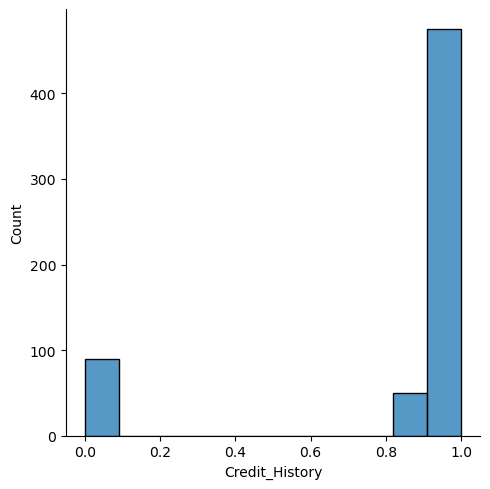

In [208]:
sns.displot(df['Credit_History'])

In [209]:
# select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# calculate correlation matrix
corr_matrix = numerical_df.corr()

# display correlation matrix
corr_matrix


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.893037,0.790532,0.108432,0.434849,-0.024085
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.342781,-0.237900,0.711061,0.204179,-0.042941
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.620102,0.551556,0.417763,0.895324,0.044905
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.069830,-0.030739,-0.079338,0.086531,0.938871
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.014447,0.019169,-0.063210,-0.025248,-0.007860
Total_Income,0.893037,0.342781,0.620102,-0.069830,-0.014447,1.000000,0.639953,0.585476,0.503817,-0.042237
ApplicantIncomeLog,0.790532,-0.237900,0.551556,-0.030739,0.019169,0.639953,1.000000,0.021399,0.491066,-0.014618
CoapplicantIncomeLog,0.108432,0.711061,0.417763,-0.079338,-0.063210,0.585476,0.021399,1.000000,0.393070,-0.055967
LoanAmountLog,0.434849,0.204179,0.895324,0.086531,-0.025248,0.503817,0.491066,0.393070,1.000000,0.084534
Loan_Amount_TermLog,-0.024085,-0.042941,0.044905,0.938871,-0.007860,-0.042237,-0.014618,-0.055967,0.084534,1.000000


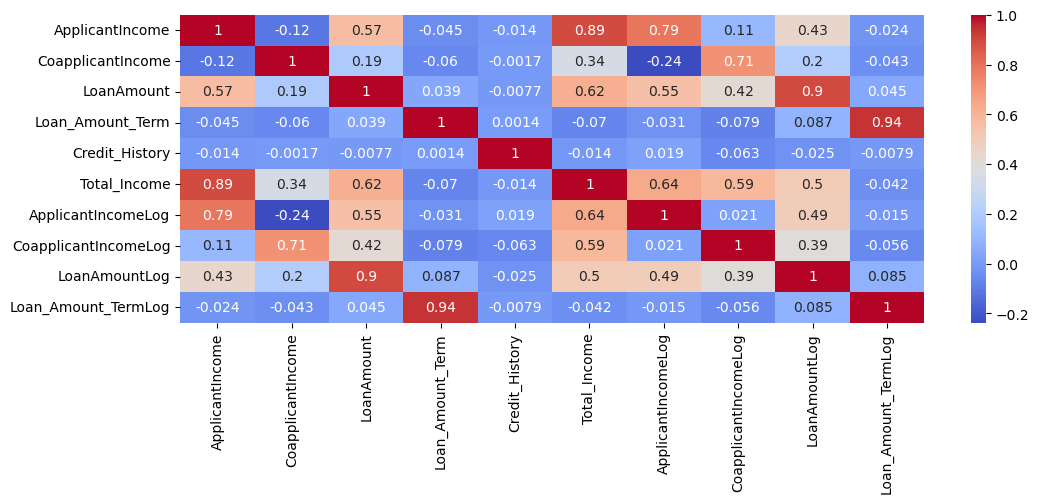

In [210]:
plt.figure(figsize = (12, 4))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [211]:
col = ['Loan_ID', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_TermLog']
df = df.drop(col, axis=1)

In [212]:
df = df.drop(columns = ['CoapplicantIncomeLog'], axis = 1)

In [213]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,LoanAmountLog
609,Female,No,0,Graduate,No,360.0,1.0,Rural,Y,2900.0,7.972466,4.262680
610,Male,Yes,3+,Graduate,No,180.0,1.0,Rural,Y,4106.0,8.320205,3.688879
611,Male,Yes,1,Graduate,No,360.0,1.0,Urban,Y,8312.0,8.996157,5.533389
612,Male,Yes,2,Graduate,No,360.0,1.0,Urban,Y,7583.0,8.933664,5.231109
613,Female,No,0,Graduate,Yes,360.0,0.0,Semiurban,N,4583.0,8.430109,4.890349


In [216]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in cols:
    df[col] = le.fit_transform(df[col])

In [217]:
target_variable = 'Loan_Status'
feature_names = [col for col in df.columns if col != target_variable]


# --- Data Splitting by specifying the input and output---
X = df[feature_names].values
y = df[target_variable].values

In [218]:
test_size = 0.2
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)

# --- Feature Scaling (Important for some methods) ---

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)
result = model.score(X_test_scaled, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(np.mean(result))

Accuracy: 78.049%

0.7804878048780488

In [219]:
X_train_scaled[:5]

array([[ 4.83392534e-01,  7.57441713e-01, -7.23275126e-01,
        -5.34172551e-01, -3.97515871e-01,  2.94492056e-01,
        -6.85711483e-03, -4.69514807e-02,  1.67302053e-01,
         5.14997706e-01,  1.42057915e+00],
       [ 4.83392534e-01,  7.57441713e-01, -7.23275126e-01,
        -5.34172551e-01, -3.97515871e-01,  2.94492056e-01,
         4.47845557e-01, -4.69514807e-02, -2.06401666e-01,
        -5.66489340e-01, -2.03861126e-04],
       [ 4.83392534e-01,  7.57441713e-01,  1.26068067e+00,
        -5.34172551e-01, -3.97515871e-01,  2.94492056e-01,
         4.47845557e-01, -4.69514807e-02,  1.19651704e-01,
         5.77420755e-01,  9.51465512e-01],
       [ 4.83392534e-01,  7.57441713e-01, -7.23275126e-01,
        -5.34172551e-01, -3.97515871e-01,  2.94492056e-01,
         4.47845557e-01, -4.69514807e-02, -3.04045824e-01,
        -1.10276950e+00, -4.69233014e-02],
       [ 4.83392534e-01, -1.32023360e+00, -7.23275126e-01,
        -5.34172551e-01, -3.97515871e-01,  2.94492056e-01,
  

In [220]:
from sklearn?

Object `sklearn` not found.


ScaledLR: 0.814735 (0.038780)

LDA: 0.814776 (0.042594)

KNN: 0.784082 (0.032058)

CART: 0.710735 (0.057826)

NB: 0.804531 (0.036409)

SVM: 0.806571 (0.038659)

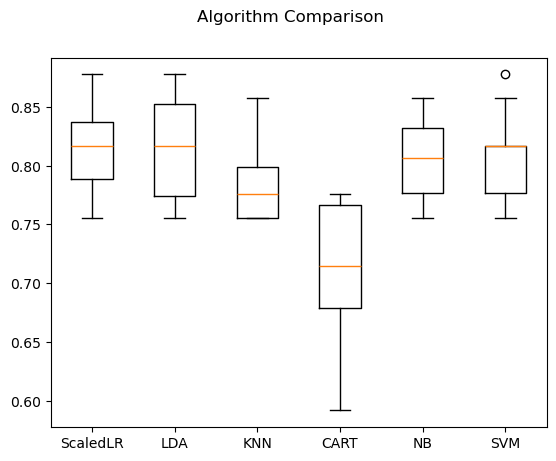

In [221]:
# prepare models
models = []
models.append(('ScaledLR', Pipeline([('Scaler', LogisticRegression())]))) # this is the only model with the scaler object while the rest of the model did not perform the data standardization
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ScaledLR: 0.814735 (0.038780)

ScaledLDA: 0.814776 (0.042594)

ScaledKNN: 0.784082 (0.032058)

ScaledCART: 0.722939 (0.044347)

ScaledNB: 0.804531 (0.036409)

ScaledSVM: 0.806571 (0.038659)

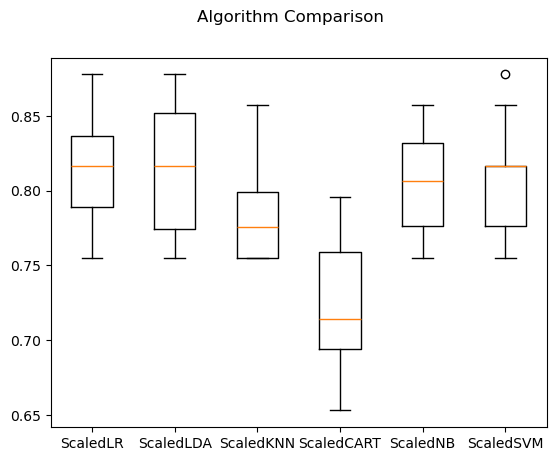

In [222]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', SVC())])))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [223]:
# Scaling the data
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [224]:
# Define the hyperparameter grid for Logistic Regression
param_grid = [
    {'penalty': ['l1'], 'C': np.logspace(-3, 3, 7), 'solver': ['liblinear'], 'class_weight': [None, 'balanced']},
    {'penalty': ['l2'], 'C': np.logspace(-3, 3, 7), 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'class_weight': [None, 'balanced']},
    {'penalty': ['elasticnet'], 'C': np.logspace(-3, 3, 7), 'solver': ['saga'], 'l1_ratio': np.linspace(0, 1, 5), 'class_weight': [None, 'balanced']},
    {'penalty': [None], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'class_weight': [None, 'balanced']}
]

# Define the cross-validation strategy
num_folds = 5  # You can adjust this
seed = 7      # You can adjust this
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=seed)

# Initialize GridSearchCV
scoring = 'accuracy'  # Define your scoring metric
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

# Fit the GridSearchCV object
grid_result = grid.fit(rescaledX, Y_train)

# Print the results
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.816656 using {'C': 1.0, 'class_weight': None, 'l1_ratio': 0.25, 'penalty': 'elasticnet', 'solver':
'saga'}

In [225]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostClassifier(algorithm='SAMME'))])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
     kfold = KFold(n_splits=num_folds, random_state=seed, shuffle =True)
     cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)

ScaledAB: 0.806473 (0.026100)

ScaledGBM: 0.802453 (0.016447)

ScaledRF: 0.798289 (0.025834)

ScaledET: 0.775984 (0.027220)

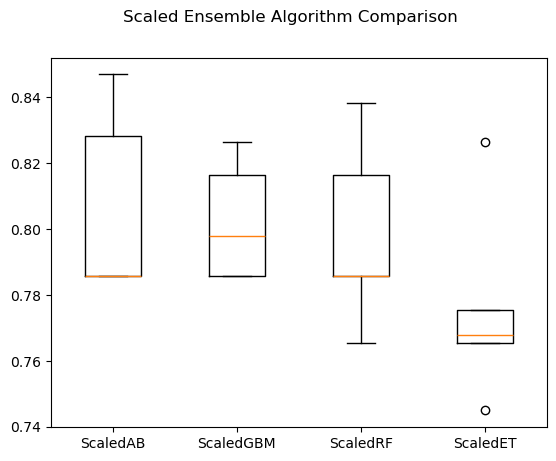

In [227]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [228]:
# Define the parameter grid
param_grid = {
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],  # Example weak learners
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME'],  # Important: explicitly set to 'SAMME'
    'random_state': [42]
}

# Create AdaBoostClassifier
model = AdaBoostClassifier()

# Create KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, n_jobs=-1)

# Fit GridSearchCV
grid_result = grid_search.fit(rescaledX, Y_train)

# Print results
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Best Parameters:
{
    'algorithm': 'SAMME',
    'estimator': DecisionTreeClassifier(max_depth=1),
    'learning_rate': 0.01,
    'n_estimators': 50,
    'random_state': 42
}

Best Accuracy: 0.8145714285714286

Test Accuracy: 0.7886178861788617

In [229]:
# Create AdaBoostClassifier
model = AdaBoostClassifier(algorithm = 'SAMME', estimator = DecisionTreeClassifier(max_depth=1), learning_rate = 0.01, n_estimators = 50, random_state = 42)
model.fit(rescaledX, Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, random_state=42)

In [230]:
predictions = model.predict(X_test_scaled)
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.7886178861788617

[[18 25]
 [ 1 79]]

precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

<Axes: >

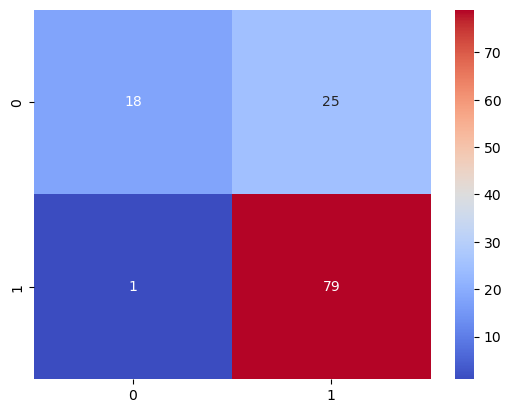

In [231]:
sns.heatmap(data = confusion_matrix(Y_test, predictions), annot = True, cmap = 'coolwarm')

In [232]:
y_pred = model.predict_proba(X_test_scaled)[:, 1]
# plt.hist(y_pred, bins = 10)
# plt.xlim(0, 1)
# plt.show()
y_pred

array([0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.11920292, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.11920292, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.11920292, 0.11920292, 0.11920292,
       0.88079708, 0.88079708, 0.11920292, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.11920292, 0.88079708,
       0.11920292, 0.88079708, 0.11920292, 0.88079708, 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.88079708, 0.88079708,
       0.11920292, 0.88079708, 0.88079708, 0.88079708, 0.11920

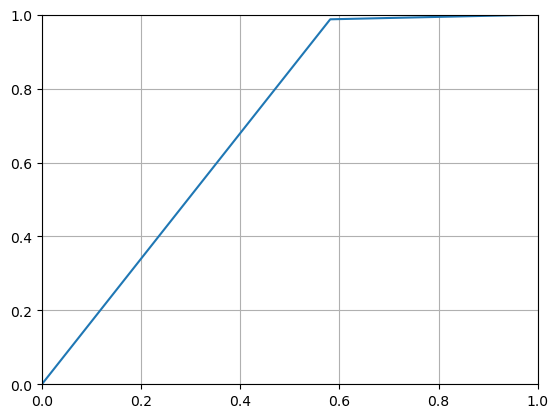

In [233]:
from sklearn.metrics import roc_curve, confusion_matrix, recall_score, precision_score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.show()

In [234]:
confusion = confusion_matrix(Y_test, predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [235]:
print(TP / (TP + FN)) # Sensitivity
print(recall_score(Y_test, predictions))

0.9875

0.9875

In [236]:
print(TN / (TN + FP)) # Specificity

0.4186046511627907

In [237]:
precision_score(Y_test, predictions) # Precision

0.7596153846153846

In [238]:
from rich import print

print(23/4, 'how far')

5.75 how far